# Assignment 4: Implementation of ConvNets (start early on this one!)
-------------------------------------
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Hi class, this is my first time giving a homework like this on ConvNets, but I think you will really enjoy it since it's practical ConvNet implementation vs. a simple math problem. *If you have any code problems, please post on the Discussion Board so your classmates and I can help!*

Below is a great demo script that I found on how to use 'Bing image downloader' with Colab! Please clean up/update the script to download at least 200 images of any two classes you would like to predict (such as 'person wearing mask' and 'person not wearing a mask'). You may need to download a few different search queries if Bing limits you to 100 images - be creative about how you can get more data. The data will download locally onto this runtime (click the folder icon on the left), and you can move files and create new folders for train, test, validation partition. You can delete any unncessary code, of course.

We haven't shown how to do this in class, but here's a code that shows you how to copy N images over from train folder to the test folder:
* https://stackoverflow.com/questions/60090552/copying-file-from-one-directory-to-another-directory-in-google-colab

If you get stuck prepping your data on the local runtime, reach out on the Discussion Board!

When you submit your assignment, I should be able to run your ENTIRE script without mounting the Google Drive since everything is locally downloaded and prepared. This will take some extra coding but I think you can hack the stuff below to make it work.

After your data is prepared, review my existing scripts and use the image generators to read data and fit a model like we did for Cats and Dogs! You can go as far as you want with this assignment in terms of the modeling but **you must build at least one vanilla ConvNet model and you must evaluate the model** (remember: evaluating a generator can be tricky, see my code for help.) If you want to go above and beyond, try using transfer learning or fine tuning or data augmentation. You will probably get a better fitting model!

Of course, your script should be beautifully laid out with lots of subheaders and comments. When you are done with this assignment, it should be of such quality that you would be proud to share this notebook with a potential employer to demonstrate your computer vision skills.

**Rubric:**
* (10 points) Provide a nice five to ten sentence of the problem you are trying to solve with image classification (please only do binary classification for this assignment.)
* (40 points) Image downloader code below has been adapted to work on local runtime. New directories are created for train, test and validation partition of each class.
* (20 points) Fit a ConvNet model
* (20 points) Evaluate the ConvNet model
* (10 points) At least five meaningful, thoughtful bullets of what you learned in this assignment.

Severe points will be deducted if the notebook does not have lots of headers, text cells, comments etc. Zero points if the code is not 'run all' in its entirety before submitting (so that I can review the code output!)

Ask friends for help but do your own work. I hope you enjoy this assignment.


#Problem Statement

My goal in this assignment is to implement a ConvNet model to classify images of pizza or ice cream. I will train the model to classify if a given image is an image of pizza or an image of ice cream. This model can be used practically for automated food recognition systems. Automated food recognition systems can be useful for things like, nutrition applications. These systems can be useful for applications that can tell you the nutrition information of your meals just from a picture.

In [419]:
!pip install bing-image-downloader

In [420]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


#New directories

In [ ]:
#download pizza images for modeling
from bing_image_downloader import downloader
downloader.download("pizza", limit=200,  output_dir='images', adult_filter_off=True, force_replace=False)

In [ ]:
#download icecream images for modeling
downloader.download("icecream", limit=200,  output_dir='images', adult_filter_off=True, force_replace=False)

In [423]:
import os
import random
import shutil

#define source directory
source_dir = '/content/images/'

#define directories for train, test, and validation sets in dataset directory
dataset_dir = '/content/dataset/'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'validation')

#define categories (pizza and icecream)
categories = ['pizza', 'icecream']

#define split percentages
split_percentages = {'train': 0.6, 'test': 0.2, 'validation': 0.2}

#copy files to target directory
def copy_files(files, target_dir, category):
    category_path = os.path.join(target_dir, category)
#create category directory
    os.makedirs(category_path, exist_ok=True)
    for file in files:
        src = os.path.join(source_dir, category, file)
        if os.path.isfile(src):
            cat = os.path.join(category_path, file)
            shutil.copy(src, cat)

#move images into directories
for category in categories:
    #list of images for category
    category_images = [img for img in os.listdir(os.path.join(source_dir, category)) if os.path.isfile(os.path.join(source_dir, category, img))]
    #shuffle images
    random.shuffle(category_images)

    #calculate split sizes
    total_images = len(category_images)
    train_size = int(total_images * split_percentages['train'])
    test_size = int(total_images * split_percentages['test'])
    val_size = total_images - train_size - test_size

    #split and copy images for each category
    copy_files(category_images[:train_size], train_dir, category)
    copy_files(category_images[train_size:train_size + test_size], test_dir, category)
    copy_files(category_images[train_size + test_size:], val_dir, category)

#Fit Model

In [424]:
from keras.preprocessing.image import ImageDataGenerator

#all images rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(

        #target directory
        train_dir,

        #all images resized to 150x150
        target_size=(150, 150),

        #10 batch
        batch_size=10,

        #binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 411 images belonging to 2 classes.
Found 367 images belonging to 2 classes.


In [425]:
for data_batch, labels_batch in train_generator:

#print shape of data in batch
    print('data batch shape:', data_batch.shape)

#print shape of labels in batch
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [426]:
from keras import layers
from keras import models

#define ConvNet architecture
model = models.Sequential()

#convolutional layer and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

#max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#flatten layer
model.add(layers.Flatten())

#dense layer with 512 units and ReLU activation
model.add(layers.Dense(512, activation='relu'))

#output layer with 1 unit and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

In [427]:
#summary of model architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 17, 17, 128)     

In [428]:
#compile model with binary crossentropy loss, RMSprop optimizer with learning rate 1e-4, and accuracy metric
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [429]:
#calculate number of images in train and val sets
train_num_images = len(list(train_generator.filepaths))
val_num_images = len(list(validation_generator.filepaths))


#calculate steps per epoch for training and val
train_steps_per_epoch = train_num_images // validation_generator.batch_size
val_steps_per_epoch = val_num_images // validation_generator.batch_size

In [431]:
import time

#start time measurement
start = time.time()

#train model
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps_per_epoch,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=val_steps_per_epoch)

#end time measurement
end = time.time()

#print total time for training
print(end - start)

Epoch 1/10
41/41 [==============================] - 76s 2s/step - loss: 0.4089 - acc: 0.8329 - val_loss: 0.3236 - val_acc: 0.8667
Epoch 2/10
41/41 [==============================] - 70s 2s/step - loss: 0.3675 - acc: 0.8379 - val_loss: 0.4135 - val_acc: 0.8194
Epoch 3/10
41/41 [==============================] - 83s 2s/step - loss: 0.3458 - acc: 0.8579 - val_loss: 0.2604 - val_acc: 0.8806
Epoch 4/10
41/41 [==============================] - 82s 2s/step - loss: 0.3110 - acc: 0.8678 - val_loss: 0.3094 - val_acc: 0.8667
Epoch 5/10
41/41 [==============================] - 84s 2s/step - loss: 0.2848 - acc: 0.8732 - val_loss: 0.2027 - val_acc: 0.9222
Epoch 6/10
41/41 [==============================] - 82s 2s/step - loss: 0.2487 - acc: 0.8953 - val_loss: 0.2702 - val_acc: 0.8944
Epoch 7/10
41/41 [==============================] - 68s 2s/step - loss: 0.2382 - acc: 0.9202 - val_loss: 0.1586 - val_acc: 0.9528
Epoch 8/10
41/41 [==============================] - 82s 2s/step - loss: 0.2151 - acc: 0.92

#Model Evaluation

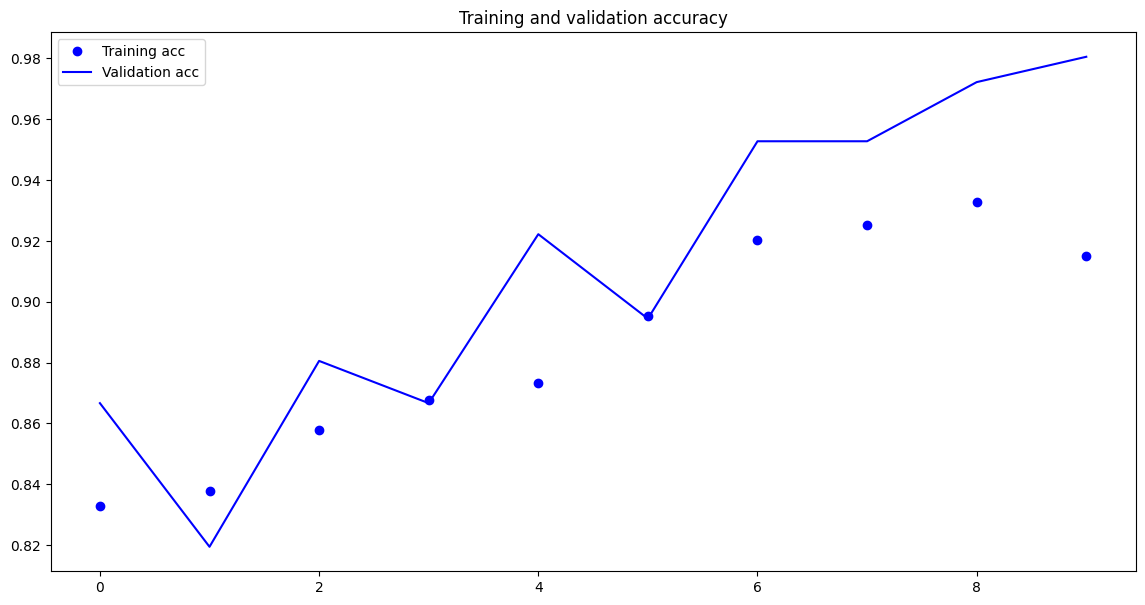

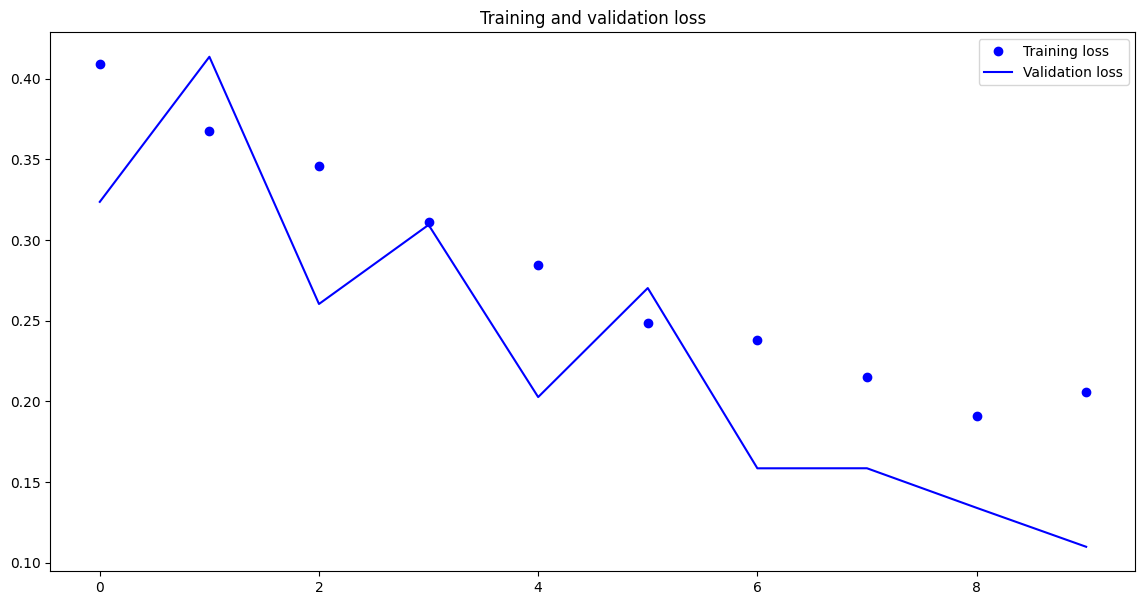

In [432]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#display
plt.show()

In [433]:
import numpy as np

#preds on validation generator
tmp = model.predict(validation_generator)

#print shape
print(tmp.shape)

#print first 5 preds
print(tmp[0:5])

#round preds
pred = np.round(tmp,0)

#print shape
print(pred.shape)

#print first 5 preds
print(pred[0:5])

37/37 [==============================] - 30s 806ms/step
(367, 1)
[[0.8988905 ]
 [0.7535102 ]
 [0.87403166]
 [0.24463664]
 [0.0164014 ]]
(367, 1)
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [434]:
#labels from validation generator
validation_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [435]:
#flatten
def flatten(l):
    return [item for sublist in l for item in sublist]

In [436]:
import pandas as pd

#store actual and predicted values
my_results = pd.DataFrame(columns=['actual','pred'])
batches = 0

#iterate over validation generator
for x_val, y_val in validation_generator:
  batches=batches+1

#make preds on current batch
  y_pred = model.predict(x_val)
#flatten preds
  y_pred = flatten(y_pred)

#create DataFrame with actual and predicted values for current batch
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})

#concat current batch results with main DataFrame
  my_results = pd.concat([my_results, tmp])

#check if number of batches processed equals steps per epoch for validation
  if batches >= val_steps_per_epoch:

    break

1/1 [==============================] - 0s 130ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 128ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 129ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 131ms/step


In [437]:
#print results
my_results

,actual,pred
0,1.0,0.949874
1,0.0,0.005028
2,1.0,0.985815
3,0.0,0.024040
4,0.0,0.016767
...,...,...
5,1.0,0.960184
6,0.0,0.009576
7,1.0,0.934889
8,1.0,0.996831


In [438]:
from sklearn.metrics import classification_report

#print classification report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       184
         1.0       0.99      0.97      0.98       176

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [439]:
from sklearn.metrics import confusion_matrix

#print confusion matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[182   2]
 [  5 171]]


In [440]:
from sklearn.metrics import f1_score

#print f1_score
f1_score(my_results['actual'], np.round(my_results['pred'],0))

0.979942693409742

#Reflection

In this assignment, I learned how to use bing_image_downloader to download images from the web. I used these images in my ConvNet Model.

I also learned how to create new directories for the train, test and validation partition of each class.

I also learned how to format the data into pre-processed floating point tensors before being fed into the network.

I also learned how to softcode the steps per epoch.

The last thing I learned in this assignment was how to evaluate a ConvNet model.